In [64]:
# Source: https://www.kaggle.com/code/fetenbasak/youtube-channels-exploratory-data-analysis-eda/input

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import ipywidgets as widgets
from IPython.display import display


Top 1000 Most Subscribed Youtube Channels - EDA and Visualization

In [65]:
#Reading Dataset
df = pd.read_csv("topSubscribed.csv")
df.head()

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,"234,000,000","212,900,271,553","18,515",Music,2006
1,2,YouTube Movies,"161,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"152,000,000","149,084,178,448",846,Education,2006
3,4,SET India,"150,000,000","137,828,094,104","103,200",Shows,2006
4,5,MrBeast,"128,000,000","21,549,128,785",733,Entertainment,2012


Variable Description
-----------------------------------------------------

Top 1000 Most Subscribed Youtube Channels data set consists of 6 variables.

1. Youtube Channel : Name of Youtube Channel

2. Subscribers : Total Subscriber

3. Video Views : Total views

4. Video Count : Total videos

5. Category : Category of channel

6. Started : When Started the Channel

# 1.Data Preprocessing

In [66]:
df.shape

(1000, 7)

In [67]:
df.dtypes

Rank                int64
Youtube Channel    object
Subscribers        object
Video Views        object
Video Count        object
Category           object
Started             int64
dtype: object

In [68]:
#Converts each column to string data type using .astype(str) since one column is not a string data type before applying the .str.replace() method to remove commas. 
#Then, the resulting strings are converted to numeric data type using pd.to_numeric() replacing all commas with empty strings
#The errors='coerce' parameter will ensure that any non-numeric values are converted to NaN (missing value) instead of raising an error.

df["Subscribers"] = pd.to_numeric(df["Subscribers"].astype(str).str.replace(",",""), errors='coerce')
df["Video Views"] = pd.to_numeric(df["Video Views"].astype(str).str.replace(",",""), errors='coerce')
df["Video Count"] = pd.to_numeric(df["Video Count"].astype(str).str.replace(",",""), errors='coerce')

df.head()

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,234000000,212900271553,18515,Music,2006
1,2,YouTube Movies,161000000,0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006
3,4,SET India,150000000,137828094104,103200,Shows,2006
4,5,MrBeast,128000000,21549128785,733,Entertainment,2012


In [69]:
df.dtypes

Rank                int64
Youtube Channel    object
Subscribers         int64
Video Views         int64
Video Count         int64
Category           object
Started             int64
dtype: object

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             1000 non-null   int64 
 1   Youtube Channel  1000 non-null   object
 2   Subscribers      1000 non-null   int64 
 3   Video Views      1000 non-null   int64 
 4   Video Count      1000 non-null   int64 
 5   Category         1000 non-null   object
 6   Started          1000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 54.8+ KB


In [72]:
#Exclude mislable category
#df = df[df["Category"] != "https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels"]
#df.Category.unique()

#Rename mislabled category
df['Category'] = df['Category'].replace({'https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels': 'Miscellaneous'})
df.Category.unique()

array(['Music', 'Film & Animation', 'Education', 'Shows', 'Entertainment',
       'Miscellaneous', 'Gaming', 'People & Blogs', 'Sports',
       'Howto & Style', 'News & Politics', 'Comedy', 'Trailers',
       'Nonprofits & Activism', 'Science & Technology', 'Movies',
       'Pets & Animals', 'Autos & Vehicles', 'Travel & Events'],
      dtype=object)

In [92]:
#df1 dataset Pair Plot with dropped features (Start date & Rank) to compare findings.

#Remove Start date of account
df1 = df.drop(["Started"], axis = 1 )

#Remove Rank
df1 = df.drop(["Rank"], axis = 1 )

df1.head()

,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,T-Series,234000000,212900271553,18515,Music,2006
1,YouTube Movies,161000000,0,0,Film & Animation,2015
2,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006
3,SET India,150000000,137828094104,103200,Shows,2006
4,MrBeast,128000000,21549128785,733,Entertainment,2012


In [95]:
#Controlling Missing Values
df.isnull().sum()

Rank               0
Youtube Channel    0
Subscribers        0
Video Views        0
Video Count        0
Category           0
Started            0
dtype: int64

In [96]:
# df1 dataset with dropped features (Start Date & Rank)
df1.isnull().sum() 

Youtube Channel    0
Subscribers        0
Video Views        0
Video Count        0
Category           0
Started            0
dtype: int64

# 2. EDA and Visualization
Descriptive Statistics

In [76]:
#df1.groupby("Category").describe().T ---> dataset with dropped features
df.groupby("Category").describe().T

Category           Autos & Vehicles        Comedy     Education  \
Rank        count      1.000000e+00  6.800000e+01  4.500000e+01   
            mean       3.810000e+02  5.456765e+02  4.554222e+02   
            std                 NaN  2.862612e+02  2.933847e+02   
            min        3.810000e+02  5.500000e+01  3.000000e+00   
            25%        3.810000e+02  3.397500e+02  1.720000e+02   
            50%        3.810000e+02  5.110000e+02  4.200000e+02   
            75%        3.810000e+02  8.027500e+02  7.320000e+02   
            max        3.810000e+02  9.770000e+02  9.980000e+02   
Subscribers count      1.000000e+00  6.800000e+01  4.500000e+01   
            mean       1.890000e+07  1.847647e+07  2.519111e+07   
            std                 NaN  7.596015e+06  2.323246e+07   
            min        1.890000e+07  1.160000e+07  1.140000e+07   
            25%        1.890000e+07  1.292500e+07  1.360000e+07   
            50%        1.890000e+07  1.635000e+07  1.810000e+07   
            75%        1.890000e+07  1.990000e+07  2.760000e+07   
            max        1.890000e+07  4.400000e+07  1.520000e+08   
Video Views count      1.000000e+00  6.800000e+01  4.500000e+01   
            mean       7.666148e+09  6.244004e+09  1.418033e+10   
            std                 NaN  5.221284e+09  2.338476e+10   
            min        7.666148e+09  6.118664e+08  3.825084e+06   
            25%        7.666148e+09  2.750115e+09  3.361881e+09   
            50%        7.666148e+09  4.340215e+09  6.926902e+09   
            75%        7.666148e+09  8.414210e+09  1.395992e+10   
            max        7.666148e+09  3.031764e+10  1.490842e+11   
Video Count count      1.000000e+00  6.800000e+01  4.500000e+01   
            mean       2.908000e+03  1.440353e+03  2.936000e+03   
            std                 NaN  3.485647e+03  9.066298e+03   
            min        2.908000e+03  4.800000e+01  1.000000e+00   
            25%        2.908000e+03  2.452500e+02  4.680000e+02   
            50%        2.908000e+03  5.060000e+02  7.440000e+02   
            75%        2.908000e+03  9.540000e+02  1.481000e+03   
            max        2.908000e+03  2.594300e+04  4.902100e+04   
Started     count      1.000000e+00  6.800000e+01  4.500000e+01   
            mean       2.013000e+03  2.012824e+03  2.013844e+03   
            std                 NaN  4.084705e+00  3.309460e+00   
            min        2.013000e+03  2.005000e+03  2.006000e+03   
            25%        2.013000e+03  2.010000e+03  2.012000e+03   
            50%        2.013000e+03  2.013000e+03  2.014000e+03   
            75%        2.013000e+03  2.015000e+03  2.016000e+03   
            max        2.013000e+03  2.021000e+03  2.019000e+03   

Category           Entertainment  Film & Animation        Gaming  \
Rank        count   2.380000e+02      5.000000e+01  9.400000e+01   
            mean    5.070546e+02      4.198000e+02  5.241170e+02   
            std     2.698456e+02      2.929740e+02  2.799445e+02   
            min     5.000000e+00      2.000000e+00  7.000000e+00   
            25%     2.875000e+02      1.880000e+02  2.830000e+02   
            50%     5.195000e+02      3.550000e+02  5.535000e+02   
            75%     7.232500e+02      5.680000e+02  7.517500e+02   
            max     9.940000e+02      9.930000e+02  9.950000e+02   
Subscribers count   2.380000e+02      5.000000e+01  9.400000e+01   
            mean    2.003445e+07      2.550400e+07  1.993511e+07   
            std     1.208837e+07      2.337172e+07  1.258041e+07   
            min     1.150000e+07      1.150000e+07  1.150000e+07   
            25%     1.372500e+07      1.537500e+07  1.332500e+07   
            50%     1.625000e+07      1.955000e+07  1.560000e+07   
            75%     2.140000e+07      2.620000e+07  2.165000e+07   
            max     1.280000e+08      1.610000e+08  1.110000e+08   
Video Views count   2.380000e+02      5.000000e+01  9.400000e+01   
            mean    9.323448

# Kamilah Torres
### Exploratory Phase
Use to obtain a broad overview of our dataset in order to see what correlations appear to be interesting to pull insights from.

Text(0, 0.5, 'Channel Count')

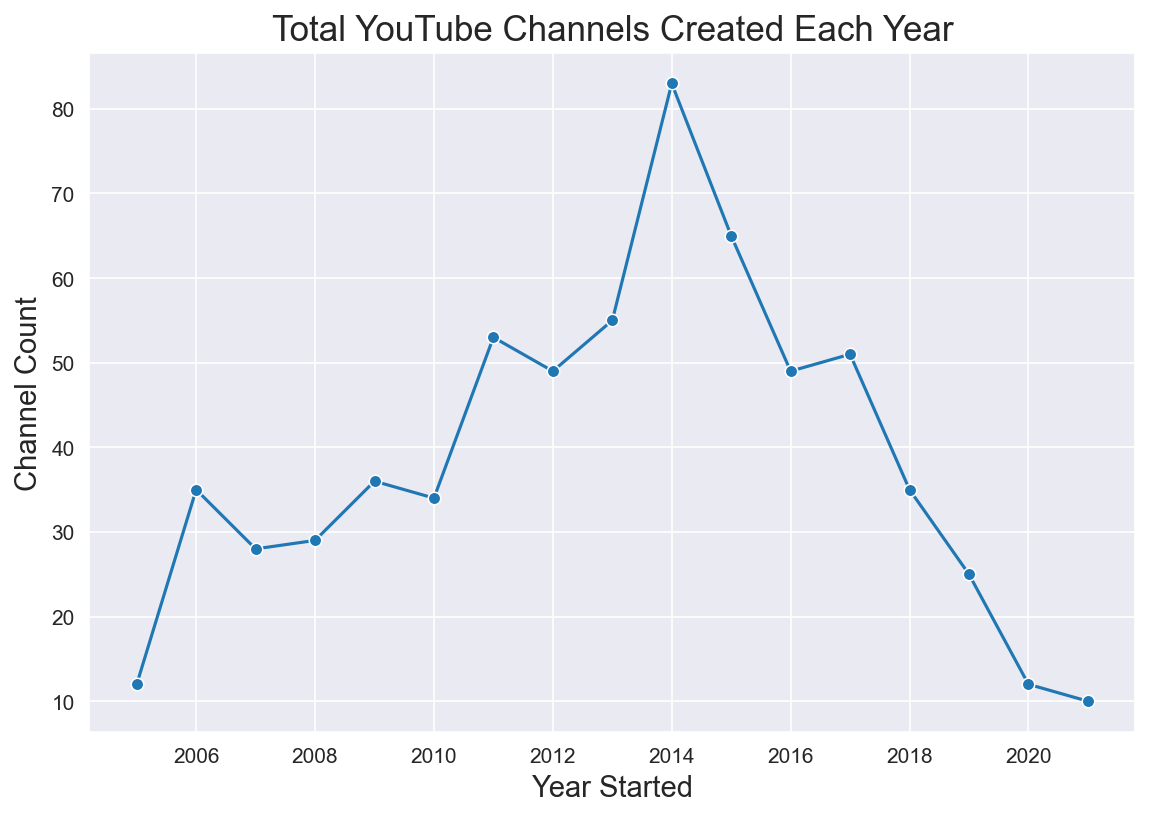

In [98]:
# Filter out the rows where Started year is 1970
filtered_yt = df[(df['Started'] != 1970) & (df['Subscribers'] < 20_000_000)]

# Count the number of channels started each year
yt_started = filtered_yt['Started'].value_counts().reset_index()
yt_started.columns = ['Started', 'Channel Count']

# Create a line plot to show the trend in channel creation
sns.lineplot(x='Started', y='Channel Count', data=yt_started, marker='o')

# Set the title and axis labels
plt.title('Total YouTube Channels Created Each Year')
plt.xlabel('Year Started')
plt.ylabel('Channel Count')

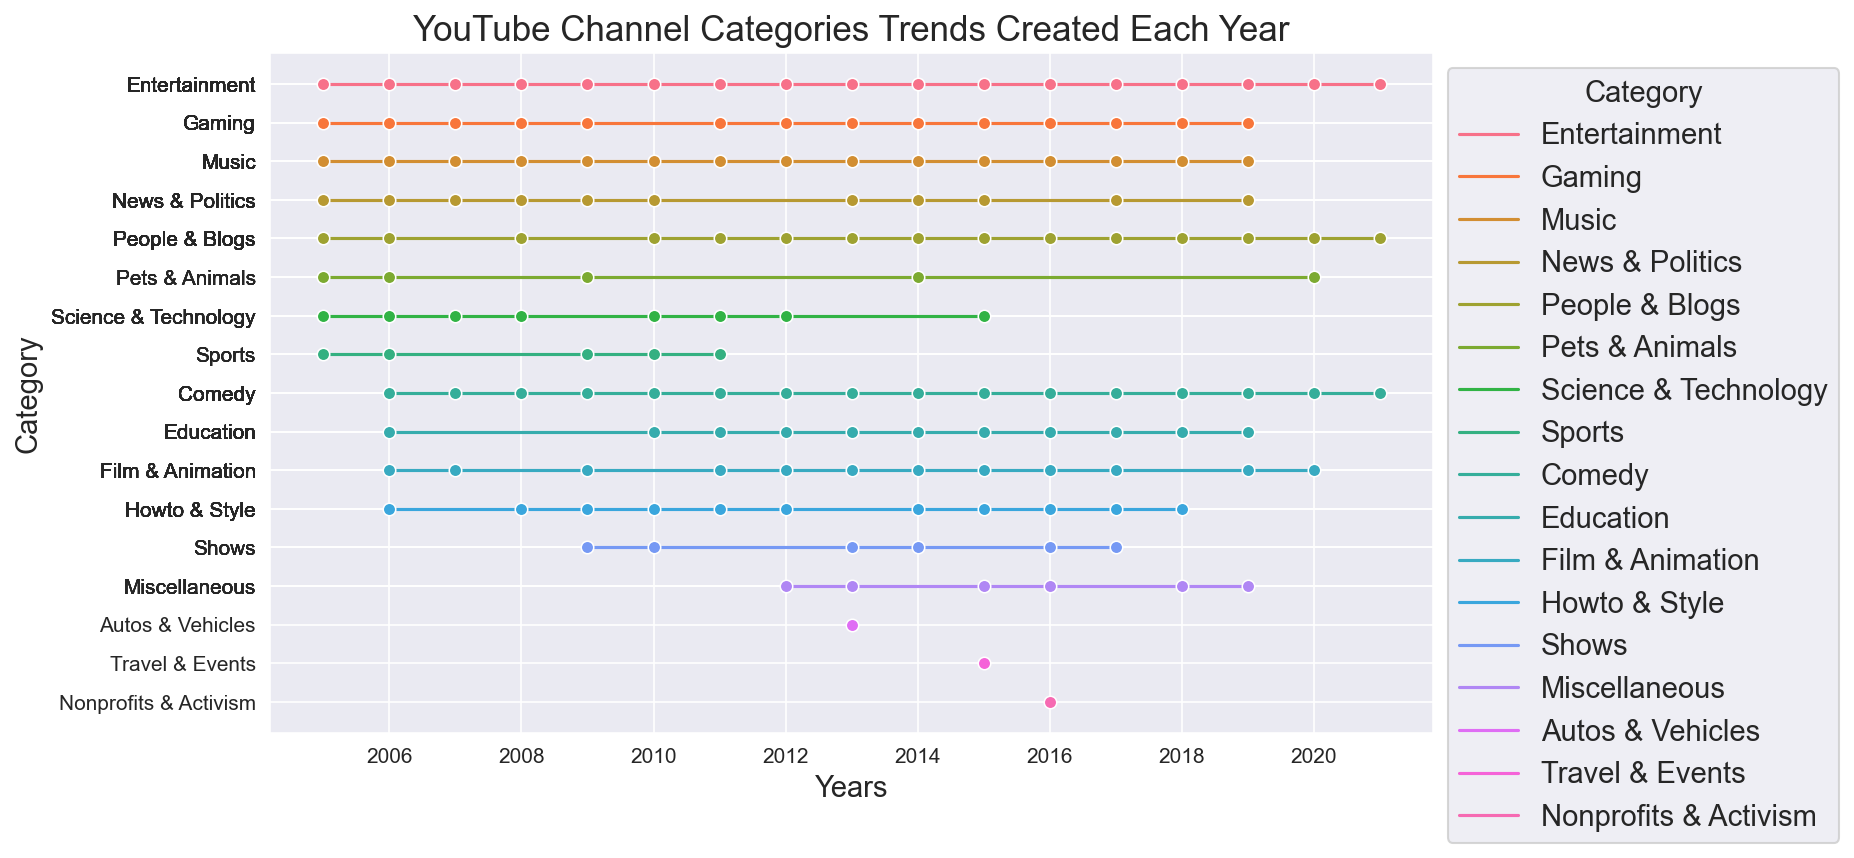

In [77]:
# Filter out the rows where Started year is 1970 and remove the outlier
filtered_yt = df[(df['Started'] != 1970) & (df['Subscribers'] < 20_000_000)]

# Count the number of channels started each year
yt_started = filtered_yt.groupby(['Started', 'Category']).size().reset_index(name='Count')

#improve visual appearance by adjusting the size of the figure
plt.figure(figsize=(10,6))
# Create a line plot to show the trend in channel creation
sns.lineplot(x='Started', y='Category', hue='Category', data=yt_started, marker='o')

# Set the title and axis labels
plt.title('YouTube Channel Categories Trends Created Each Year')
plt.xlabel('Years')
plt.ylabel('Category')

# Adjust the tick labels
plt.yticks(yt_started['Category'], yt_started['Category'].str.title(), fontsize=10)

# Show all the dates on the x-axis
#plt.xticks(ticks=yt_started['Started'], labels=yt_started['Started'], rotation=90)

# Add a legend
#The bbox_to_anchor argument allows you to adjust the position of the legend box.
plt.legend(title='Category', loc='upper left', bbox_to_anchor=(1,1))

plt.show()

#We use the filtering condition df['Subscribers'] < 20_000_000 to remove the outlier, 
#Assuming that 20 million is an appropriate cutoff for the maximum number of subscribers. 
#We include this condition in the filtering step where we define filtered_yt.

### Dig deeper to see how much of a big change in frequency each category preformed per year.

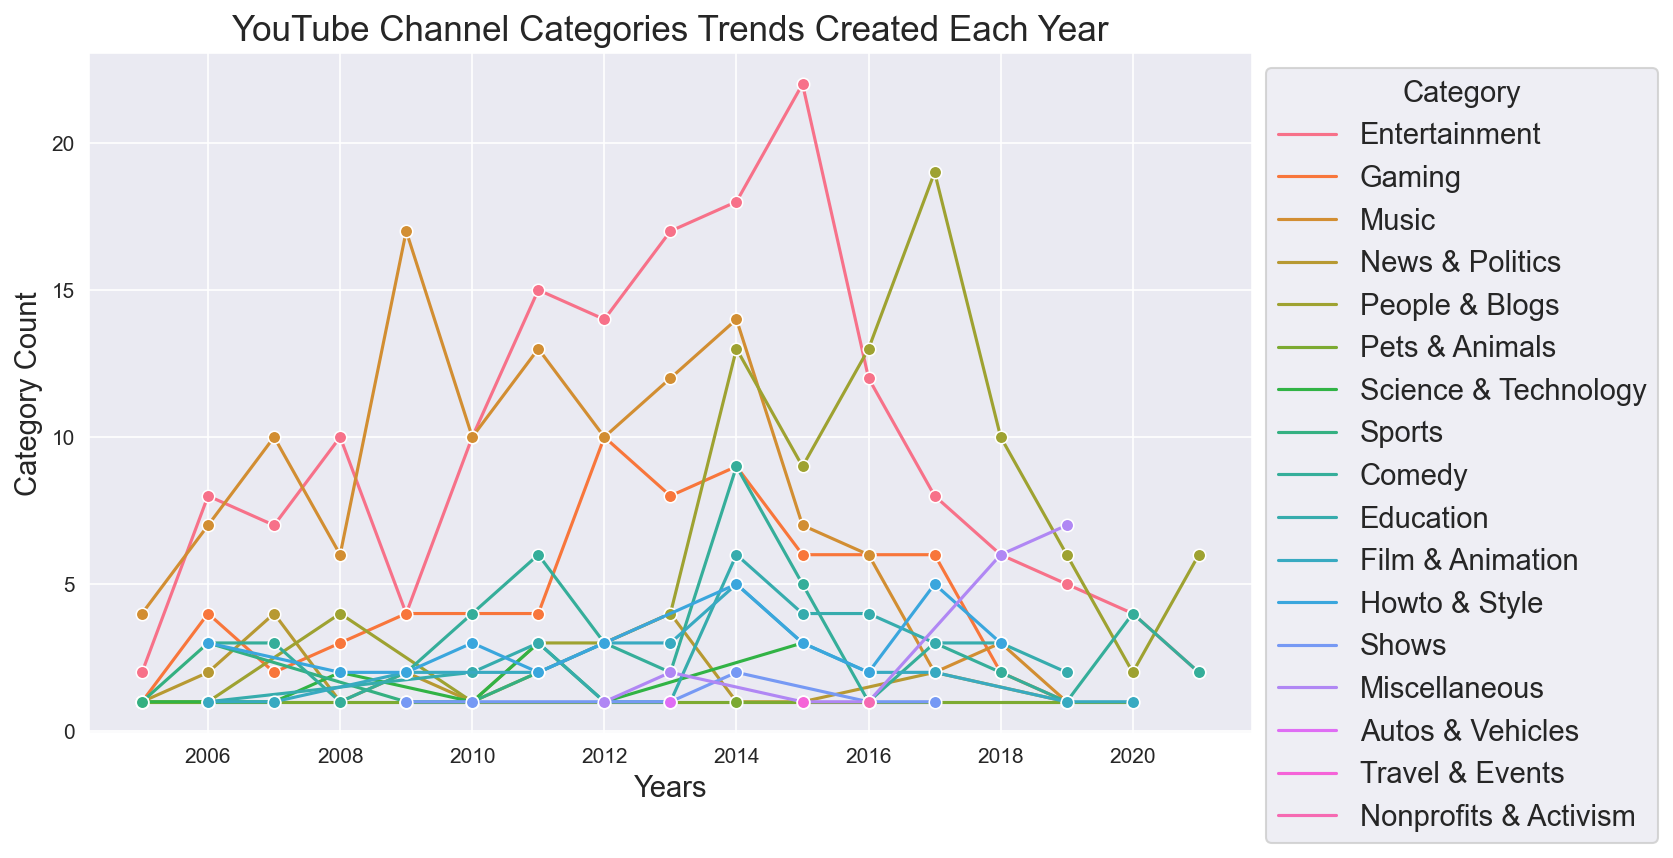

In [78]:
# Filter out the rows where Started year is 1970 and remove the outlier
filtered_yt = df[(df['Started'] != 1970) & (df['Subscribers'] < 20_000_000)]

# Count the number of channels started each year
yt_started = filtered_yt.groupby(['Started', 'Category']).size().reset_index(name='Count')

#improve visual appearance by adjusting the size of the figure
plt.figure(figsize=(10,6))

# Create a line plot to show the trend in channel creation
sns.lineplot(x='Started', y='Count', hue='Category', data=yt_started, marker='o')

# Set the title and axis labels
plt.title('YouTube Channel Categories Trends Created Each Year')
plt.xlabel('Years')
plt.ylabel('Category Count')

# Show only the years that are in the dataset
#start_years = yt_started['Started'].unique()
#plt.xticks(ticks=start_years, labels=start_years, rotation=90)

# Adjust the tick labels
plt.yticks(fontsize=10)

# Add a legend
#The bbox_to_anchor argument allows you to adjust the position of the legend box.
plt.legend(title='Category', loc='upper left', bbox_to_anchor=(1,1))

plt.show()


### Interactive features 
By creating these features, we were able to isolate each category and identify unique insights. This approach helped us focus on building relationships within each category and gain insights from the obtained data.

In [79]:
# Define the widgets
start_year = widgets.IntSlider(min=2005, max=2022, step=1, value=2015)
subscriber_cutoff = widgets.IntSlider(min=0, max=50_000_000, step=1_000_000, value=10_000_000)
category_dropdown = widgets.Dropdown(options=list(df['Category'].unique()), value='Entertainment')

# Define the function to update the plot
def update_plot(start_year, subscriber_cutoff, category_dropdown):
    # Filter the data
    filtered_yt = df[(df['Started'] != 1970) & (df['Subscribers'] < subscriber_cutoff) & (df['Category'] == category_dropdown)]
    yt_started = filtered_yt.groupby(['Started', 'Category']).size().reset_index(name='Count')
    
    # Create the plot
    plt.figure(figsize=(10,6))
    sns.lineplot(x='Started', y='Count', data=yt_started)
    plt.title('YouTube Channel Categories Trends Created Each Year')
    plt.xlabel('Years')
    plt.ylabel('Number of Channels')
    plt.xticks(rotation=90)
    plt.show()

# Define the interactive widgets
interactive_plot = widgets.interactive(update_plot, start_year=start_year, subscriber_cutoff=subscriber_cutoff, category_dropdown=category_dropdown)

# Display the widgets
display(interactive_plot)

interactive(children=(IntSlider(value=2015, description='start_year', max=2022, min=2005), IntSlider(value=100…

Text(0, 0.5, 'Category')

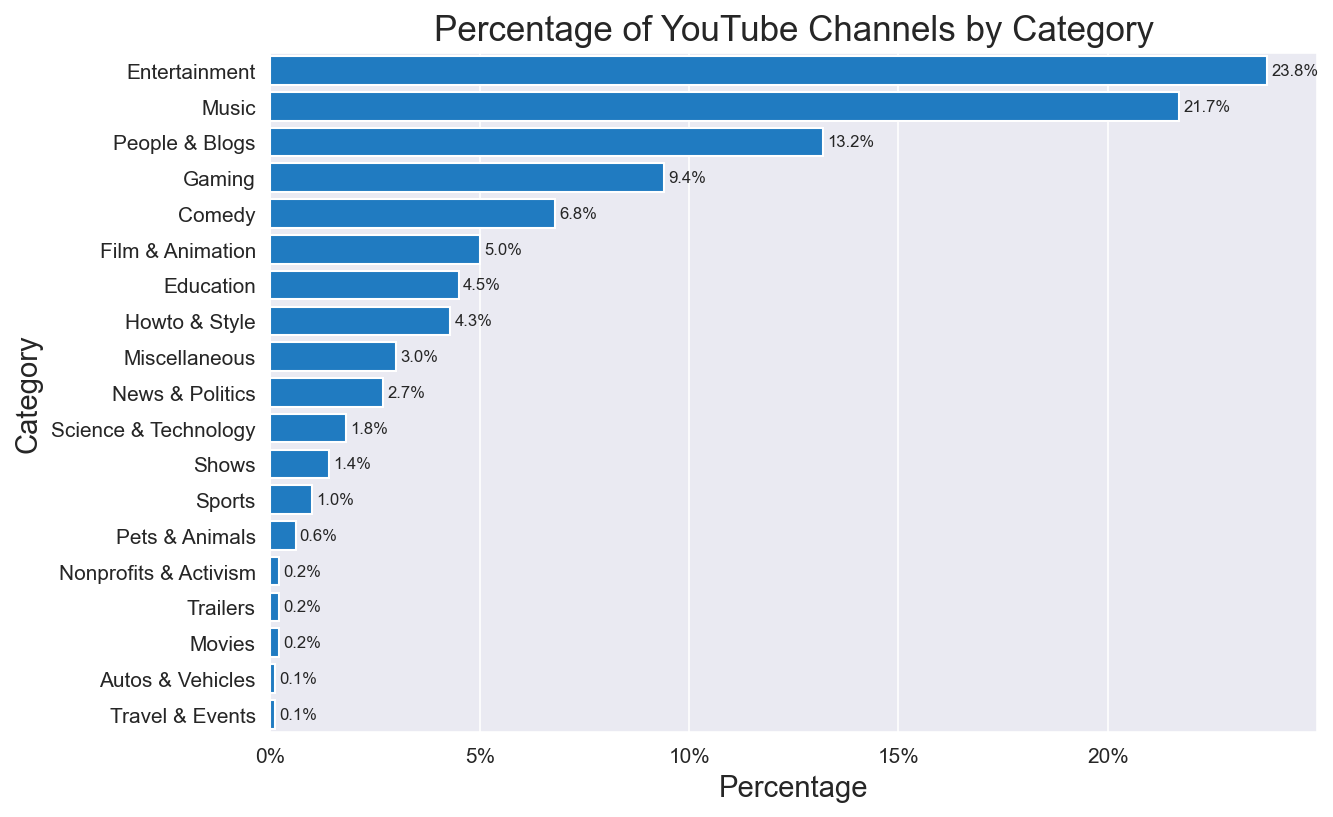

In [80]:
#takes the string in each element of the 'Category' column, splits it using the '/' character as a delimiter, and then selects the last element of the resulting list. 
#The last element of the list is selected using the [-1] indexing syntax.
#df['Category'] = df['Category'].apply(lambda x: x.split('/')[-1])

# calculate percentage of channels in each category
category = df.groupby('Category', as_index=False)['Youtube Channel'].count().sort_values('Youtube Channel', ascending=False)
total_channels = category['Youtube Channel'].sum()
category['Percentage'] = round((category['Youtube Channel'] / total_channels) * 100, ndigits=2)

# create the barplot
ax = sns.barplot(x='Percentage', y='Category', data=category, color='#057fdc')

# add labels to the bars
for p in ax.containers:
    for q in p.patches:
        x = q.get_width()
        y = q.get_y() + q.get_height() / 2
        ax.text(x+0.1, y, '{:.1f}%'.format(x), ha='left', va='center', fontsize=8)

# format x-tick labels as percentages
fmt = '{x:,.0f}%'
xticks = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)

# set the title and axis labels
ax.set_title('Percentage of YouTube Channels by Category')
ax.set_xlabel('Percentage')
ax.set_ylabel('Category')

### Top 10 Youtube Channels with The Most Subscribers

In [89]:
#Entertainment Youtube Channel

#df_game = df1[df1.Category == 'Gaming'] ---> dataset with dropped features
df_game = df[df.Category == 'Entertainment'] 
df_game.head()

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
4,5,MrBeast,128000000,21549128785,733,Entertainment,2012
11,12,Vlad and Niki,92700000,72444118381,520,Entertainment,2018
22,23,Zee TV,65400000,31291572708,80178,Entertainment,2005
31,32,Marshmello,56100000,14014958483,405,Entertainment,2015
46,47,Badabun,46300000,19053487396,16726,Entertainment,2014


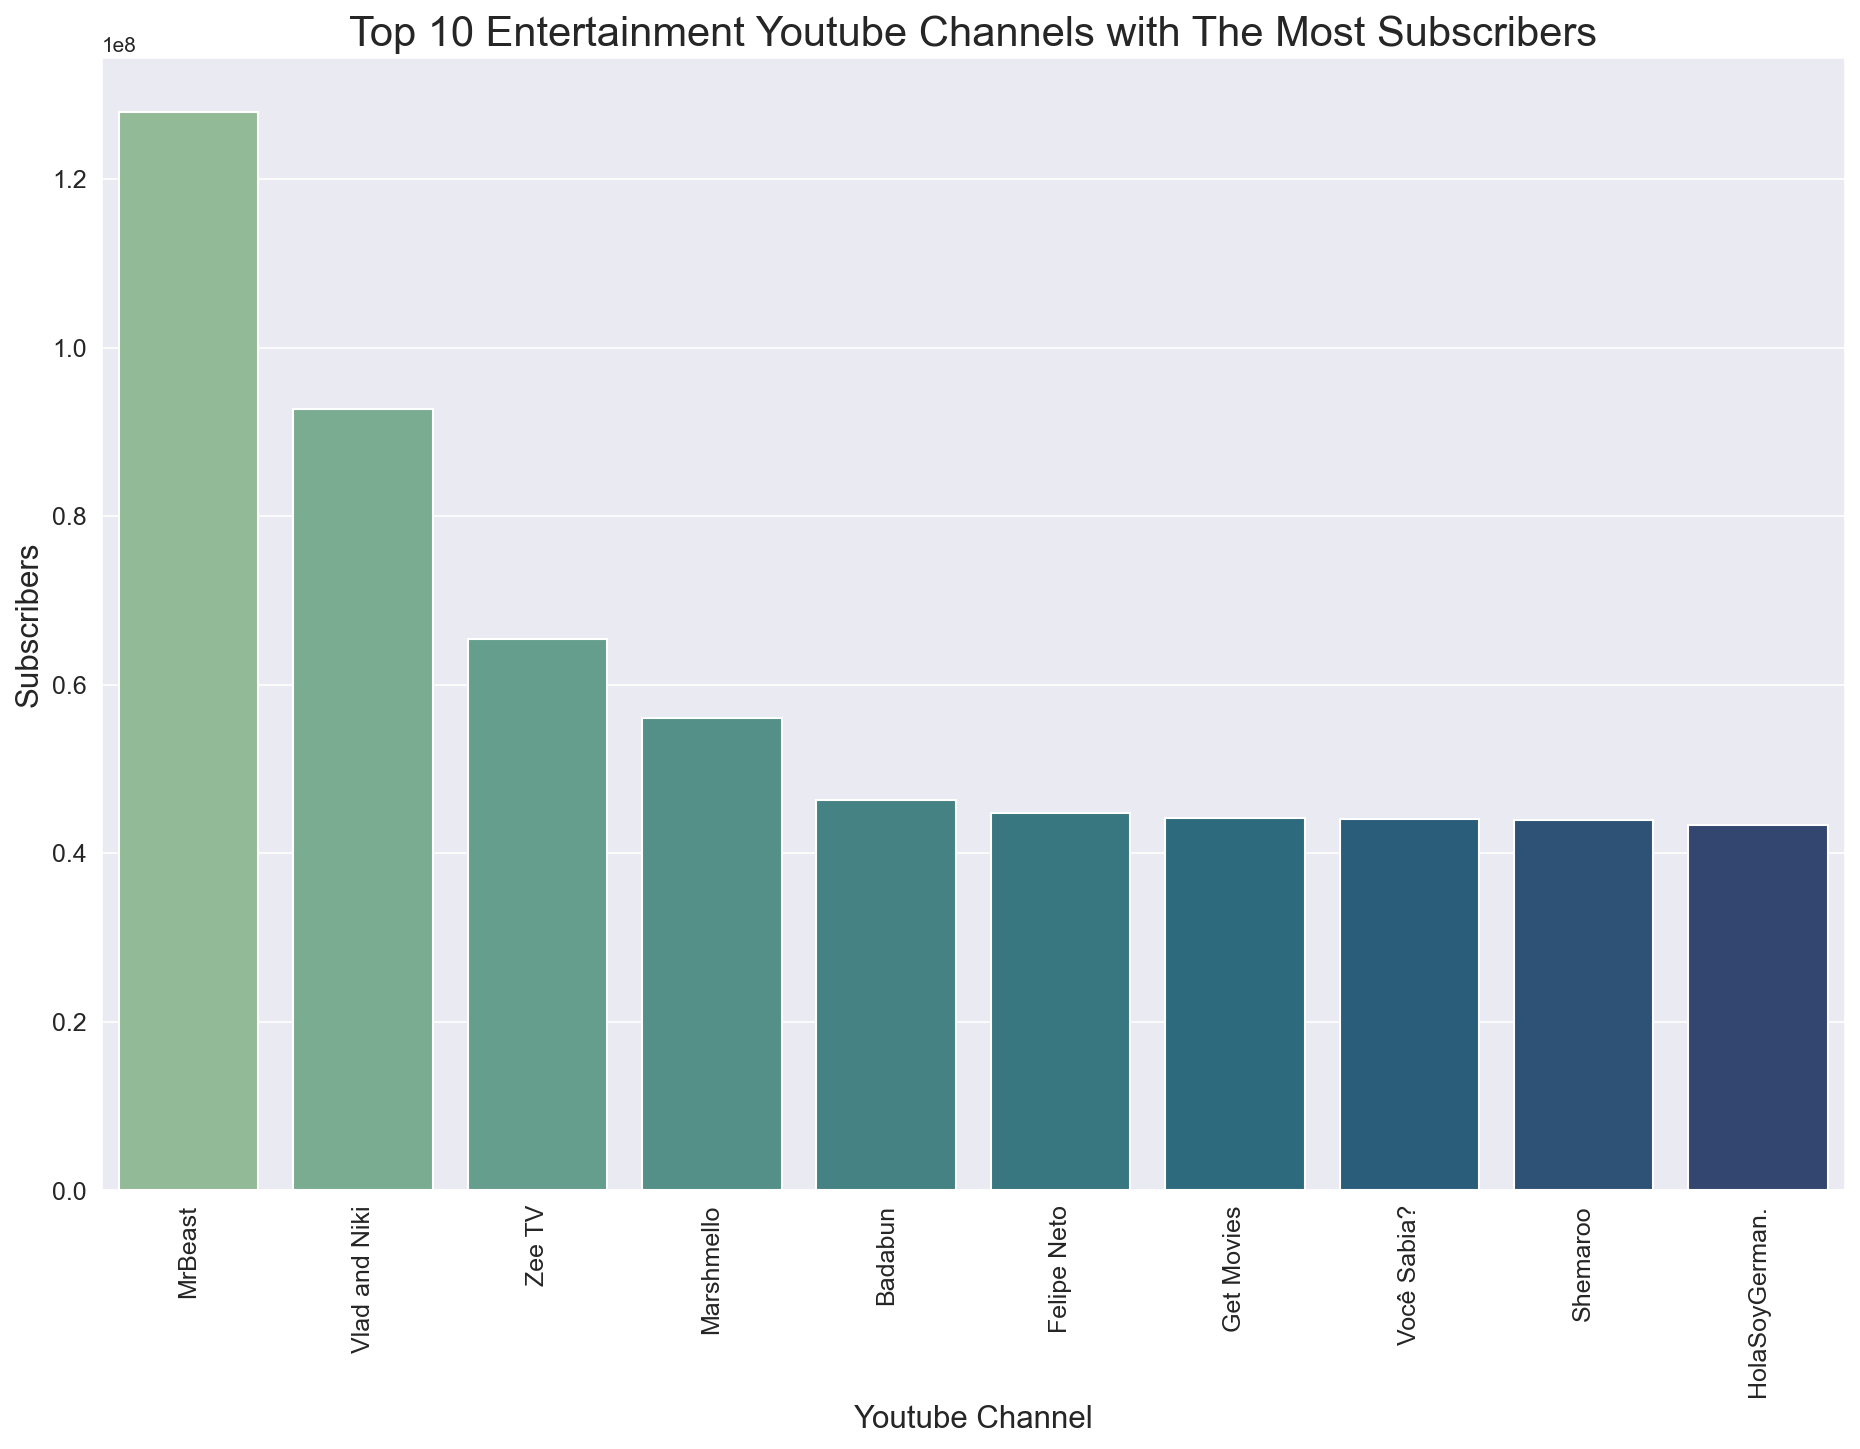

In [91]:
#The barplot() method in Seaborn requires the data parameter to specify the DataFrame, 
#and the x and y parameters to specify the column names for the horizontal and vertical axes, respectively.

new_index1 = df_game["Subscribers"].sort_values(ascending=False).index.values
sorted_df_game = df_game.reindex(new_index1)
sorted_df_game_10 = sorted_df_game[:10]

plt.figure(figsize=(15,10))
sns.barplot(data=sorted_df_game_10, x="Youtube Channel", y="Subscribers", palette="crest")

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Youtube Channel", fontsize=15)
plt.ylabel("Subscribers", fontsize=15)
plt.title("Top 10 Entertainment Youtube Channels with The Most Subscribers", fontsize=20)
plt.show()

#I added quotation marks around the column names in the first line to avoid the AttributeError. 
#Then, I used the data parameter in the barplot() method to specify the DataFrame sorted_df_game_10 
#and the x and y parameters to specify the column names for the horizontal and vertical axes, respectively. 
#I also added ticks font size parameters for better readability.

Average Subscribers of Youtube Channel According to Category
----------------------------------------------------------------------

Text(0.5, 1.0, 'Average Subscribers According to Category')

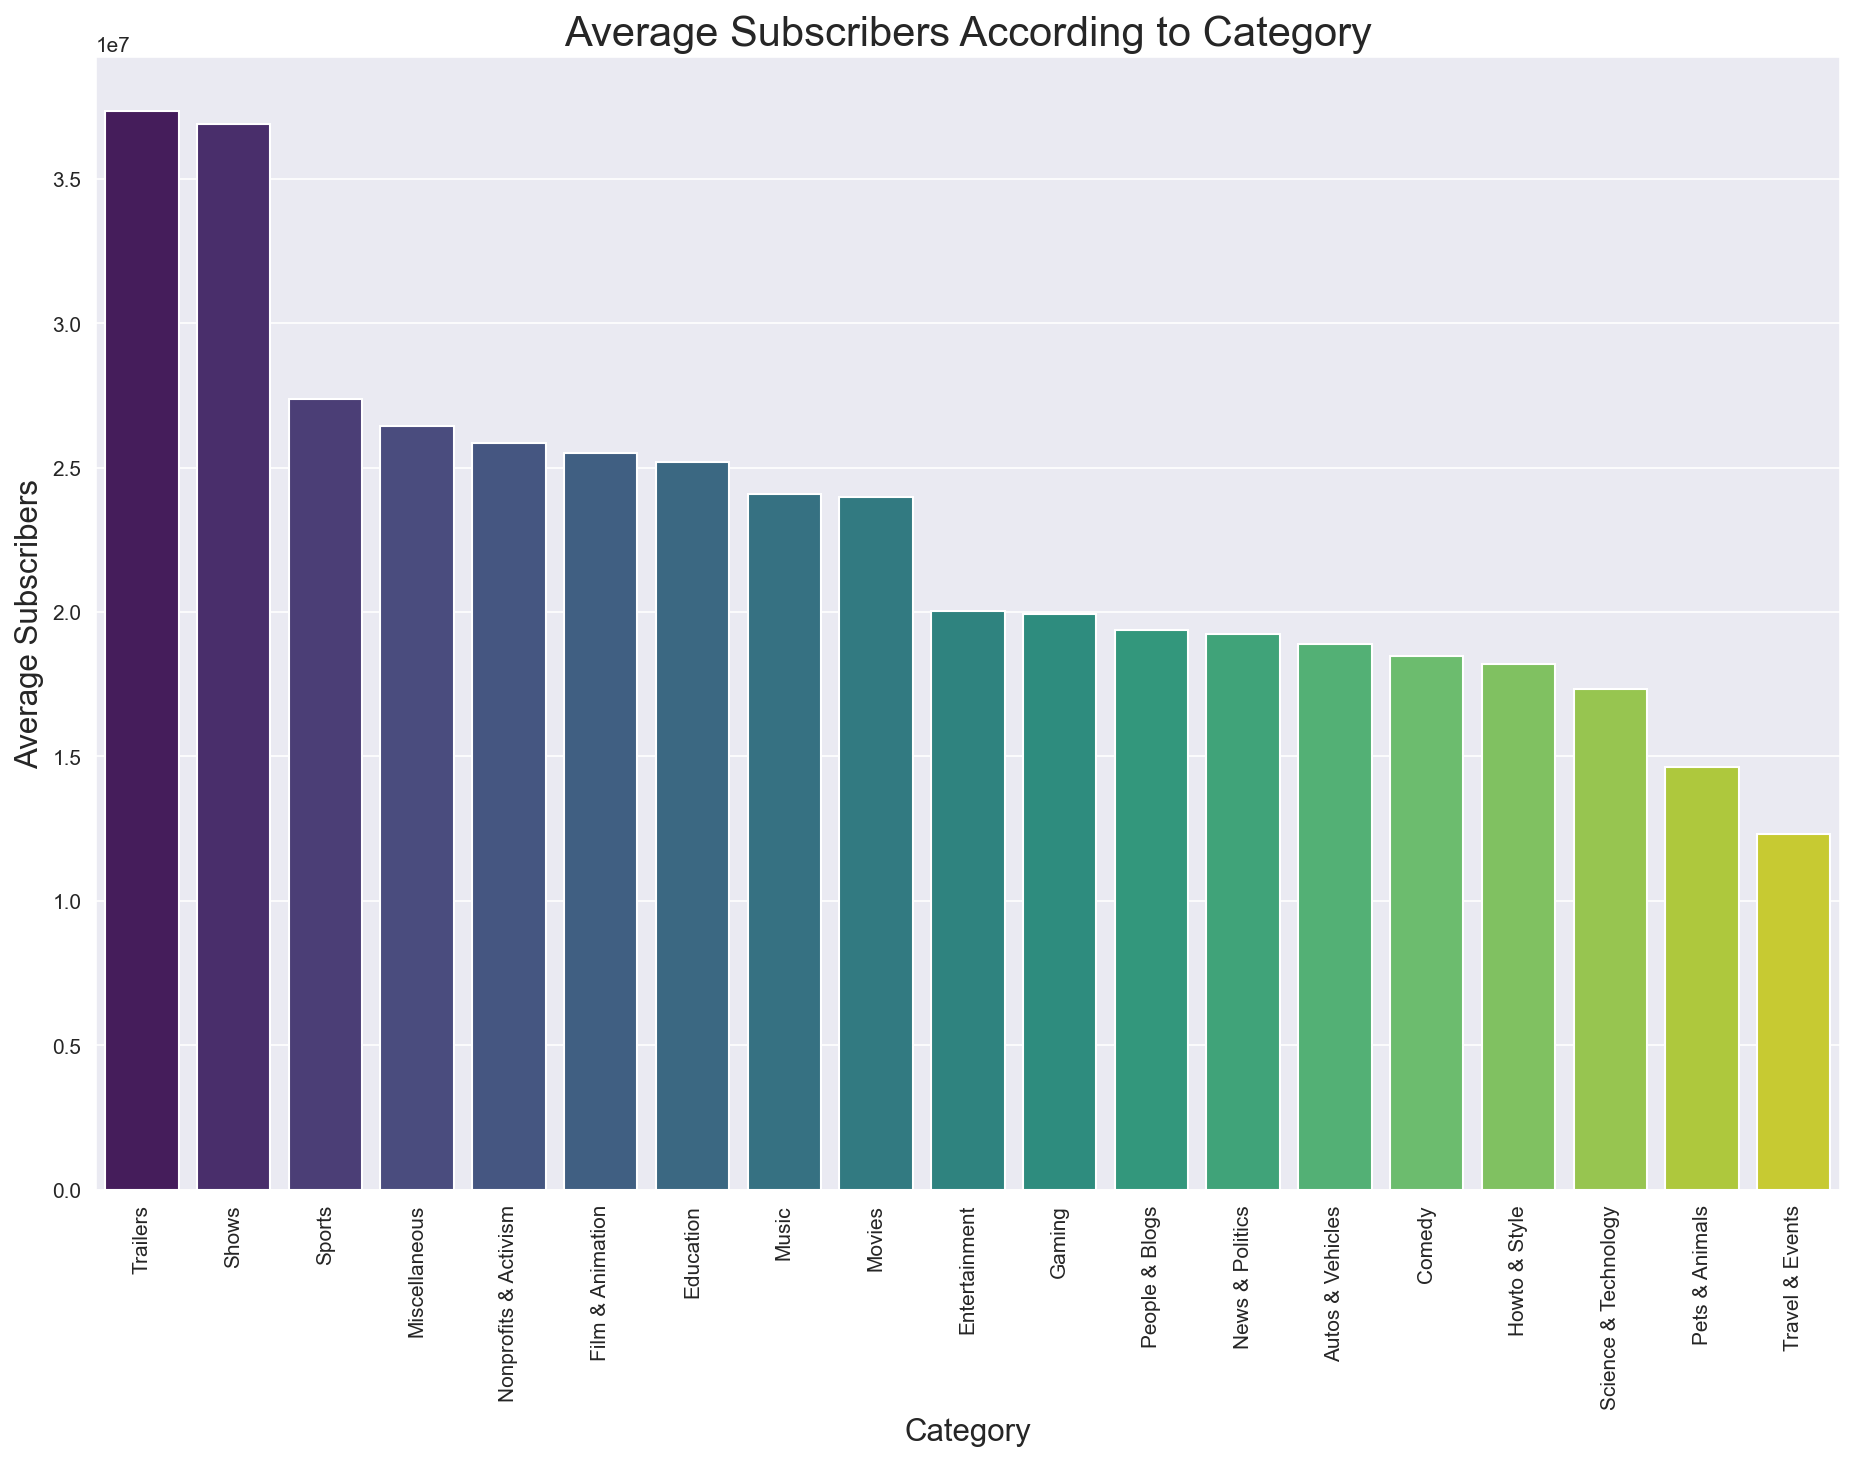

In [81]:
category_list= list(df.Category.unique())
sub = []

for i in category_list:
    x = df[df.Category == i]
    mean_sub = x["Subscribers"].mean()
    sub.append(mean_sub)
df_subs=pd.DataFrame({'categorylist':category_list,'subs':sub})
new_index = df_subs.subs.sort_values(ascending = False).index.values
sorted_df_subs = df_subs.reindex(new_index)

plt.figure(figsize=(15,10))
sns.barplot(data = sorted_df_subs, x = "categorylist", y = "subs", palette = "viridis")

plt.xticks(rotation = 90)

plt.xlabel('Category', fontsize = 15)
plt.ylabel('Average Subscribers', fontsize = 15)
plt.title('Average Subscribers According to Category',
          fontsize = 20)

### Average Video Count of Youtube Channel According to Category

Text(0.5, 1.0, 'Average Video Count Uploaded According to Category')

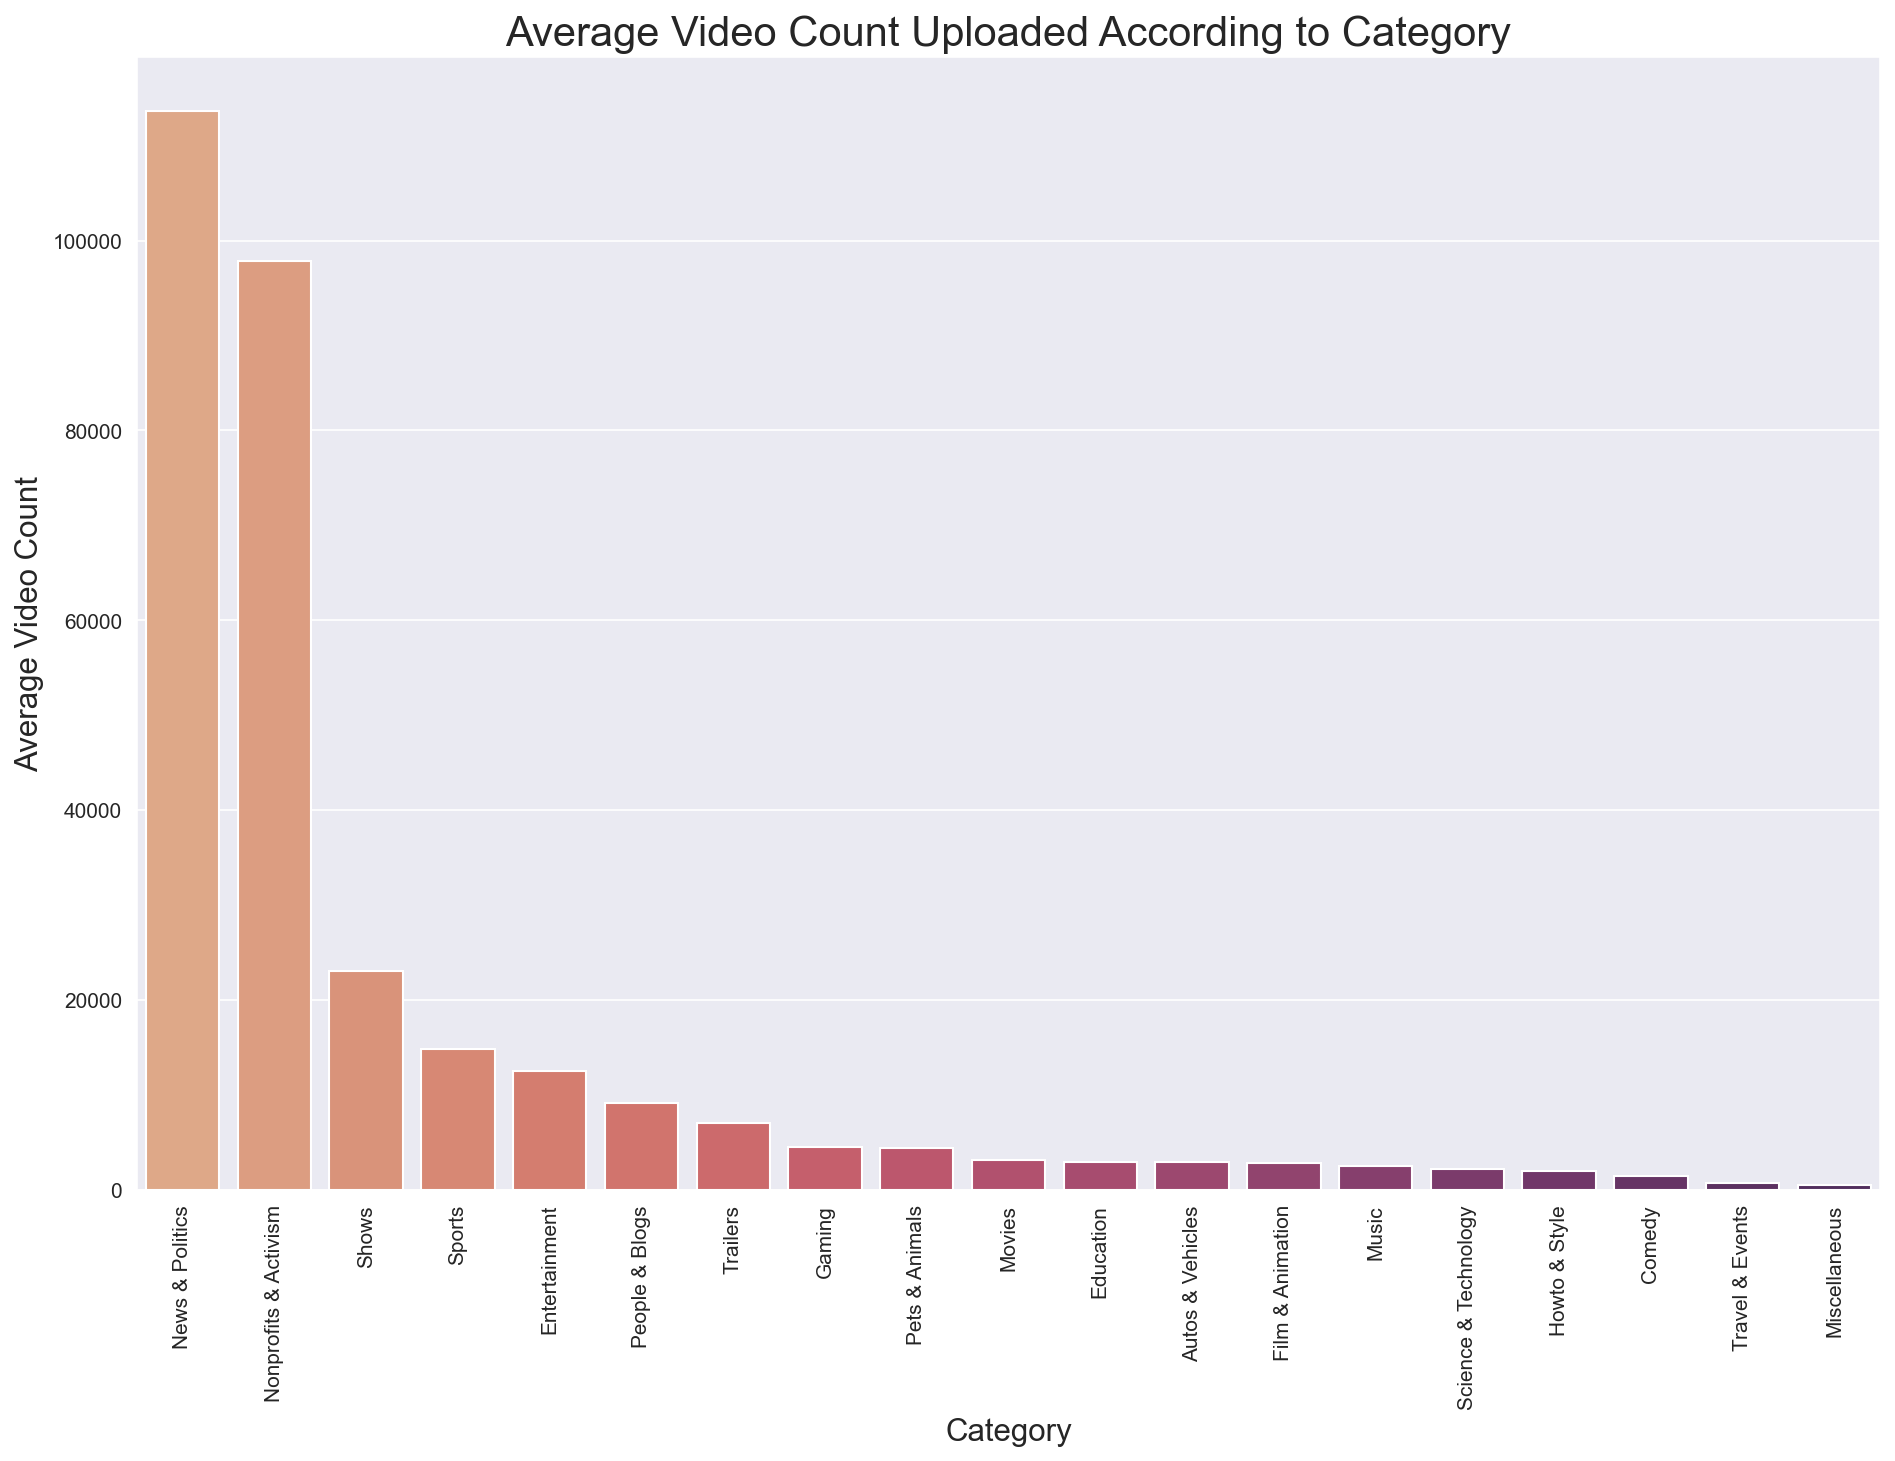

In [82]:
category_list= list(df.Category.unique())
v_count = []

for i in category_list:
    x = df[df.Category == i]
    mean_count = x["Video Count"].mean()
    v_count.append(mean_count)
df_count=pd.DataFrame({'categorylist':category_list,'VideoCount': v_count})
new_index1 = df_count.VideoCount.sort_values(ascending = False).index.values
sorted_df_count = df_count.reindex(new_index1)

plt.figure(figsize=(15,10))
sns.barplot(data = sorted_df_count, x = "categorylist", y = "VideoCount", palette ="flare")

plt.xticks(rotation = 90)

plt.xlabel('Category', fontsize = 15)
plt.ylabel('Average Video Count', fontsize = 15)
plt.title('Average Video Count Uploaded According to Category',
          fontsize = 20)

### Pair Plot
Pairplot is a special kind of FacetGrid.
Pairwise relationships between all variables in the input DataFrame will be visualized as scatter plots.

By default, a series of histograms will be displayed along the diagonal axes to show the distribution of each variable in the columns. However, since kind="kde" was specified, KDE plots are shown instead of histograms.

The pairplot displays scatterplots for each pair of variables along the diagonal, and kernel density estimate (KDE) plots for each pair of variables off the diagonal.

<Figure size 2250x1500 with 0 Axes>

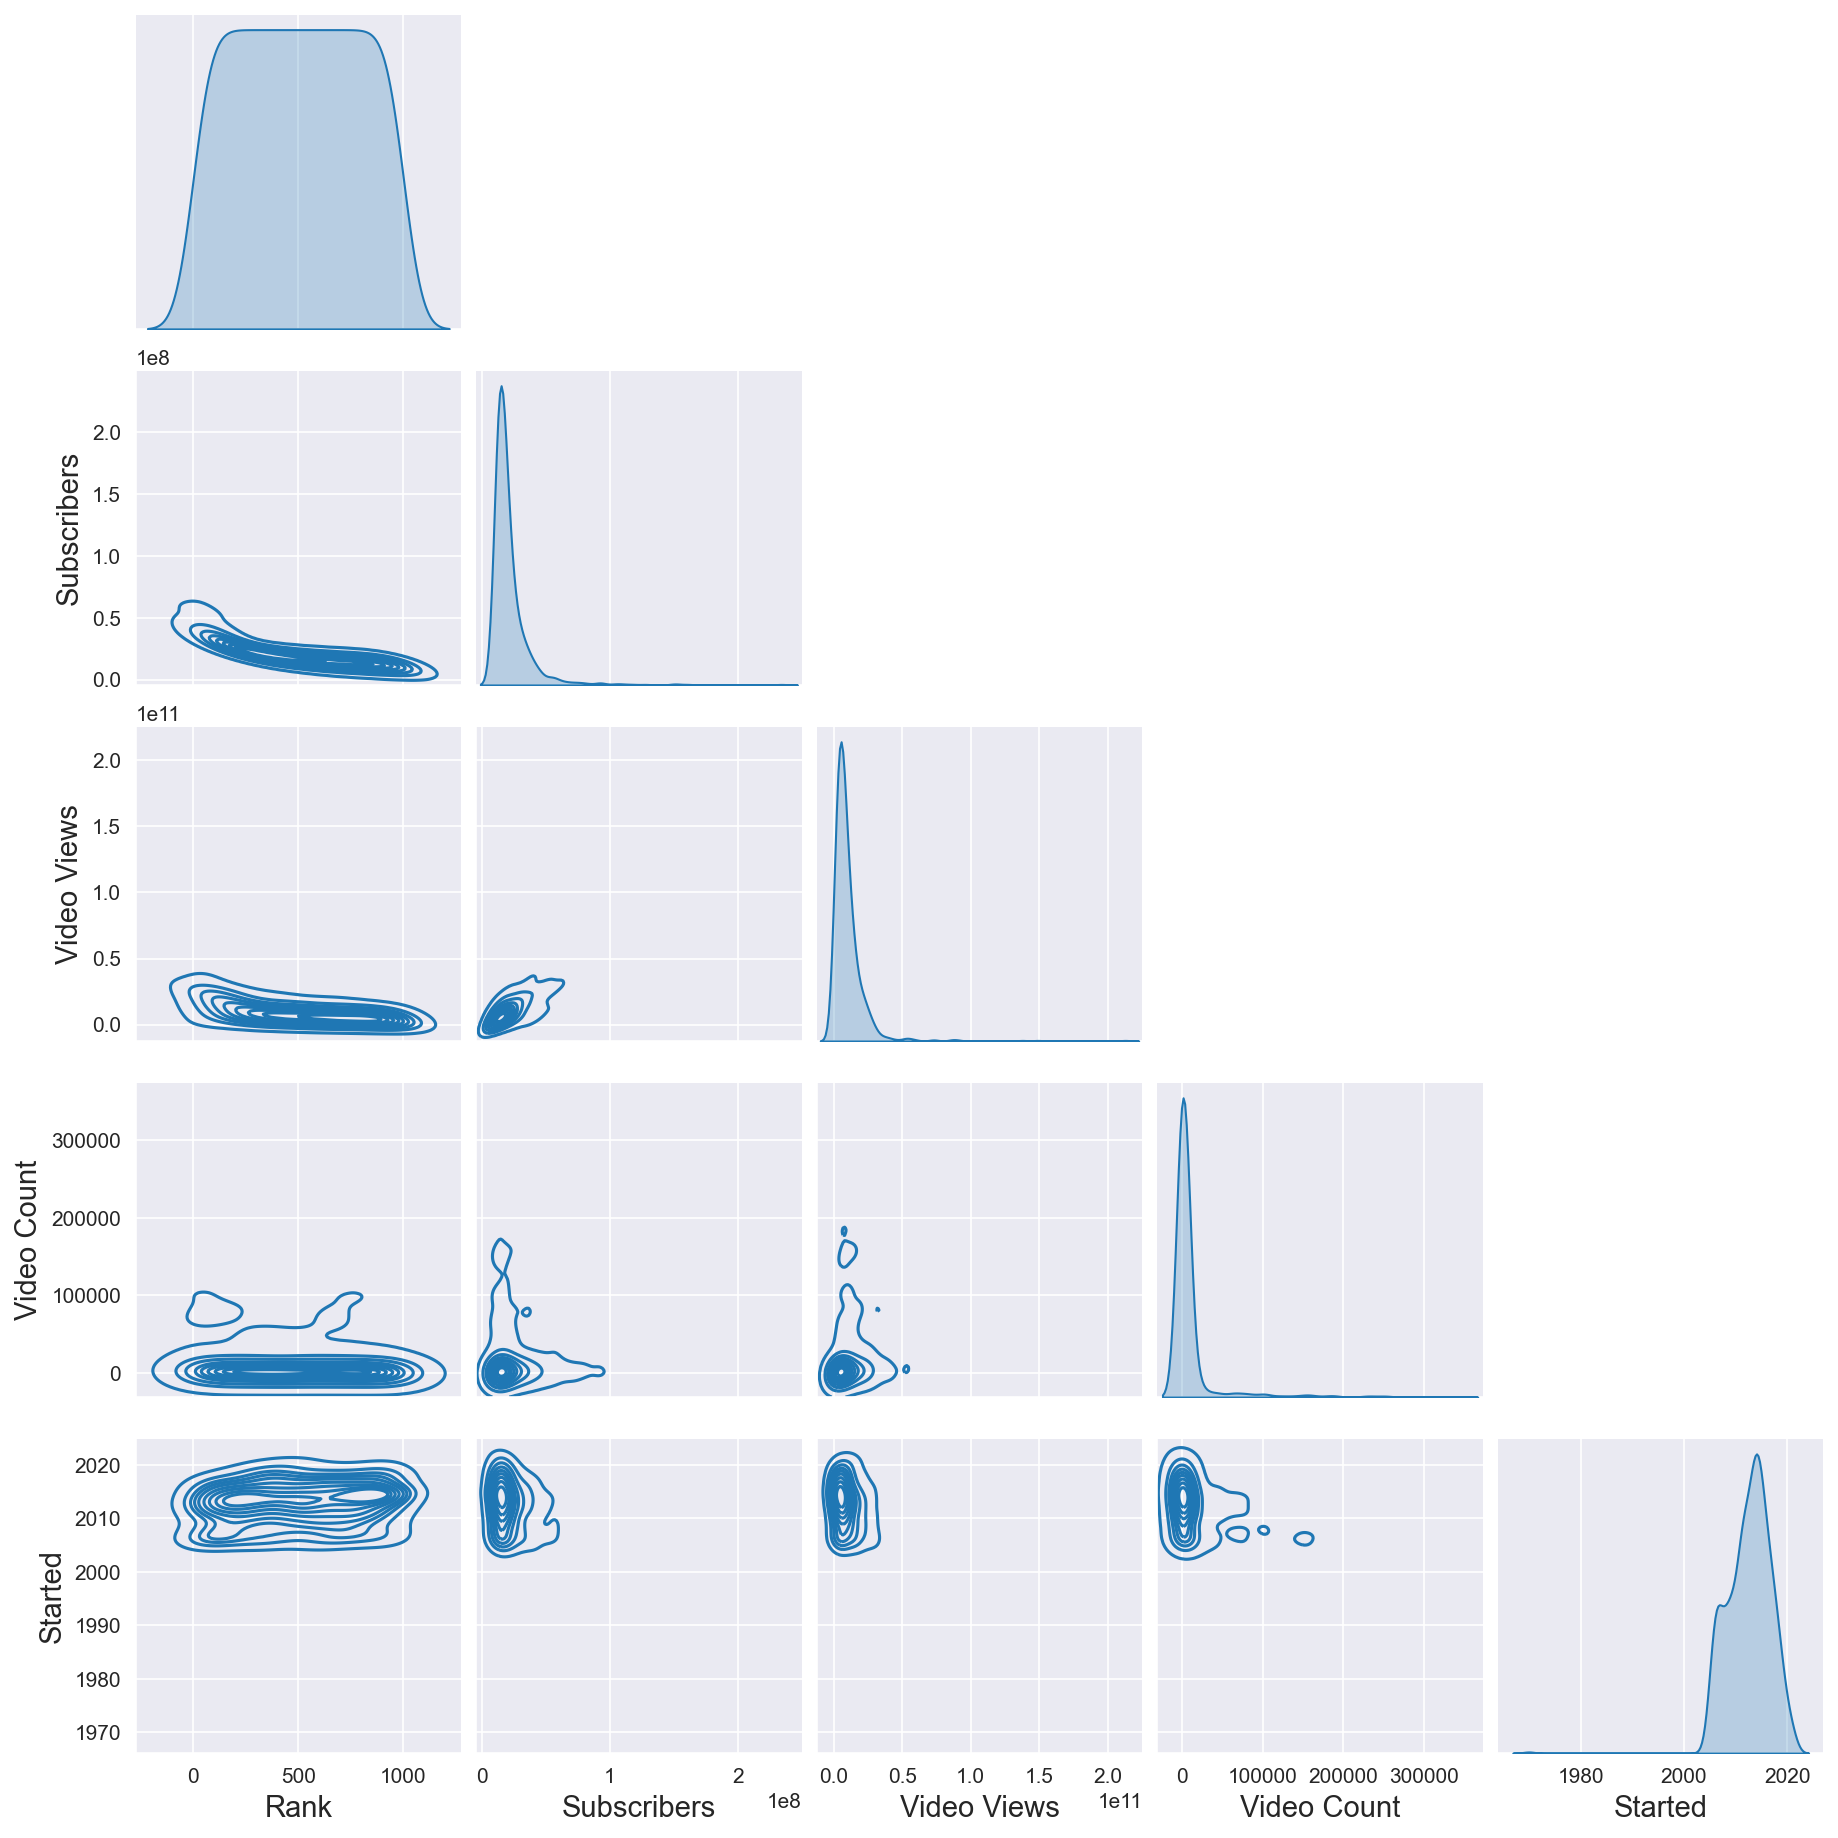

In [99]:
plt.figure(figsize= (15,10))
sns.pairplot(df ,kind ="kde", corner = True)

#kind="kde" specifies that the off-diagonal plots should use a kernel density estimate instead of scatterplots. 
#corner=True specifies that only the lower left triangle of the plot matrix should be shown, 
#since the upper right triangle is a mirror image of the lower left triangle.

<Figure size 1080x720 with 0 Axes>

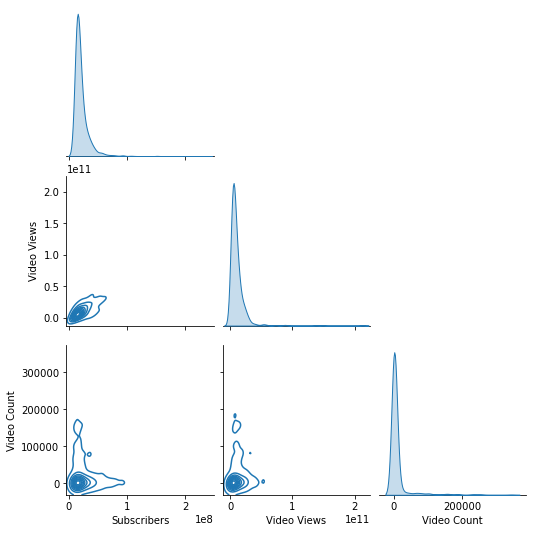

In [24]:
#df1 dataset Pair Plot with dropped features (Start date & Rank)

plt.figure(figsize= (15,10))
sns.pairplot(df1 ,kind ="kde", corner = True)

# Yea Eun Kim
### Heatmap For Top 1000 Most Subscribed Youtube Channels Dataset
Heatmap of the correlation matrix is a visualize that demonstrates the correlation between the numerical features within the dataframe. Creating a color-coded matrix with each cell colored according to the value of the corresponding correlation coefficient. 


Explain:
--------------------------------
In this case, flare is a built-in color map in seaborn that ranges from yellow to red, indicating increasing correlation coefficients.The correlation matrix shows how strongly each pair of variables is related to each other. The resulting matrix is a square matrix with the same number of rows and columns as the number of numerical variables in the dataframe.

Correlation coefficients near +1 indicate a strong positive correlation, while coefficients near -1 indicate a strong negative correlation. Coefficients near 0 indicate little or no correlation. The heatmap makes it easy to identify patterns and relationships between variables in the dataset.

<AxesSubplot:>

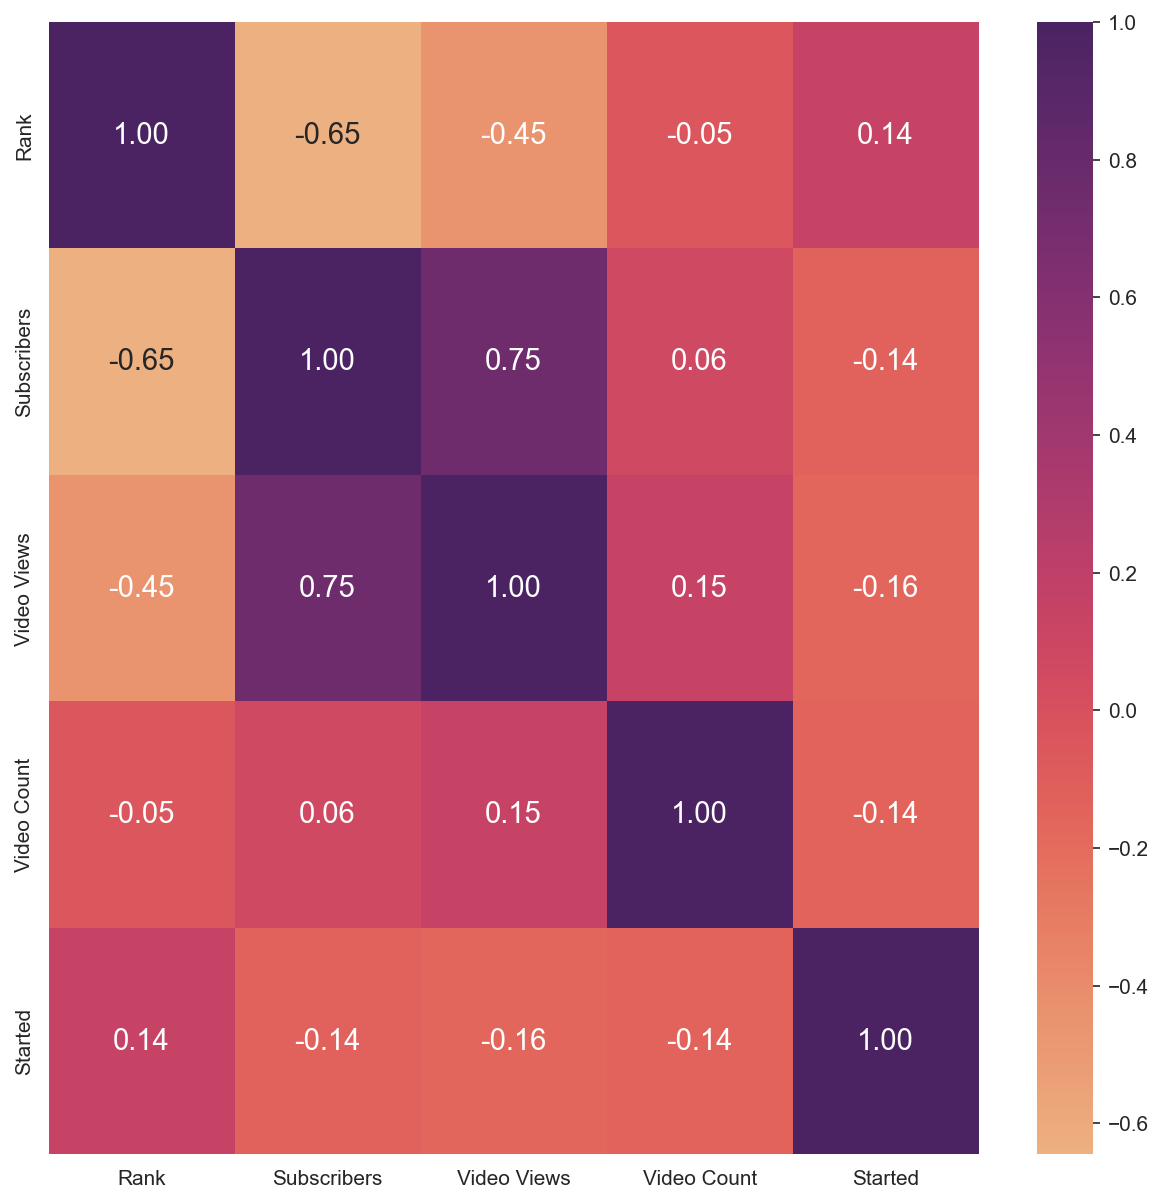

In [100]:
plt.figure(figsize = (10,10)) #This line creates a new figure with the specified size of 10 inches by 10 inches
corr = df.corr() # This line calculates the correlation matrix for the numerical columns in the df dataframe using the corr() function.
sns.heatmap(corr, annot=True, fmt=".2f", cmap ="flare" ) #This line creates a heatmap of the correlation matrix 

#corr is the correlation matrix that was calculated in the previous line.
#annot=True adds the correlation coefficients to each cell of the heatmap.
#fmt=".2f" specifies the format of the correlation coefficients as a floating-point number with two decimal places.
#cmap="flare" specifies the color map to use for the heatmap. 

### Visualize the pairwise relationships 
Created a matrix of scatterplots and histograms of all pairwise combinations of the numerical variables from within the dataframe.

The diagonal of the matrix shows the distribution of each variable, while the off-diagonal elements show the pairwise relationships between the variables. The scatterplots show how the variables are related to each other, while the histograms show the distribution of each variable individually. 

The pairplot makes it easy to identify patterns and relationships between variables in the dataset.

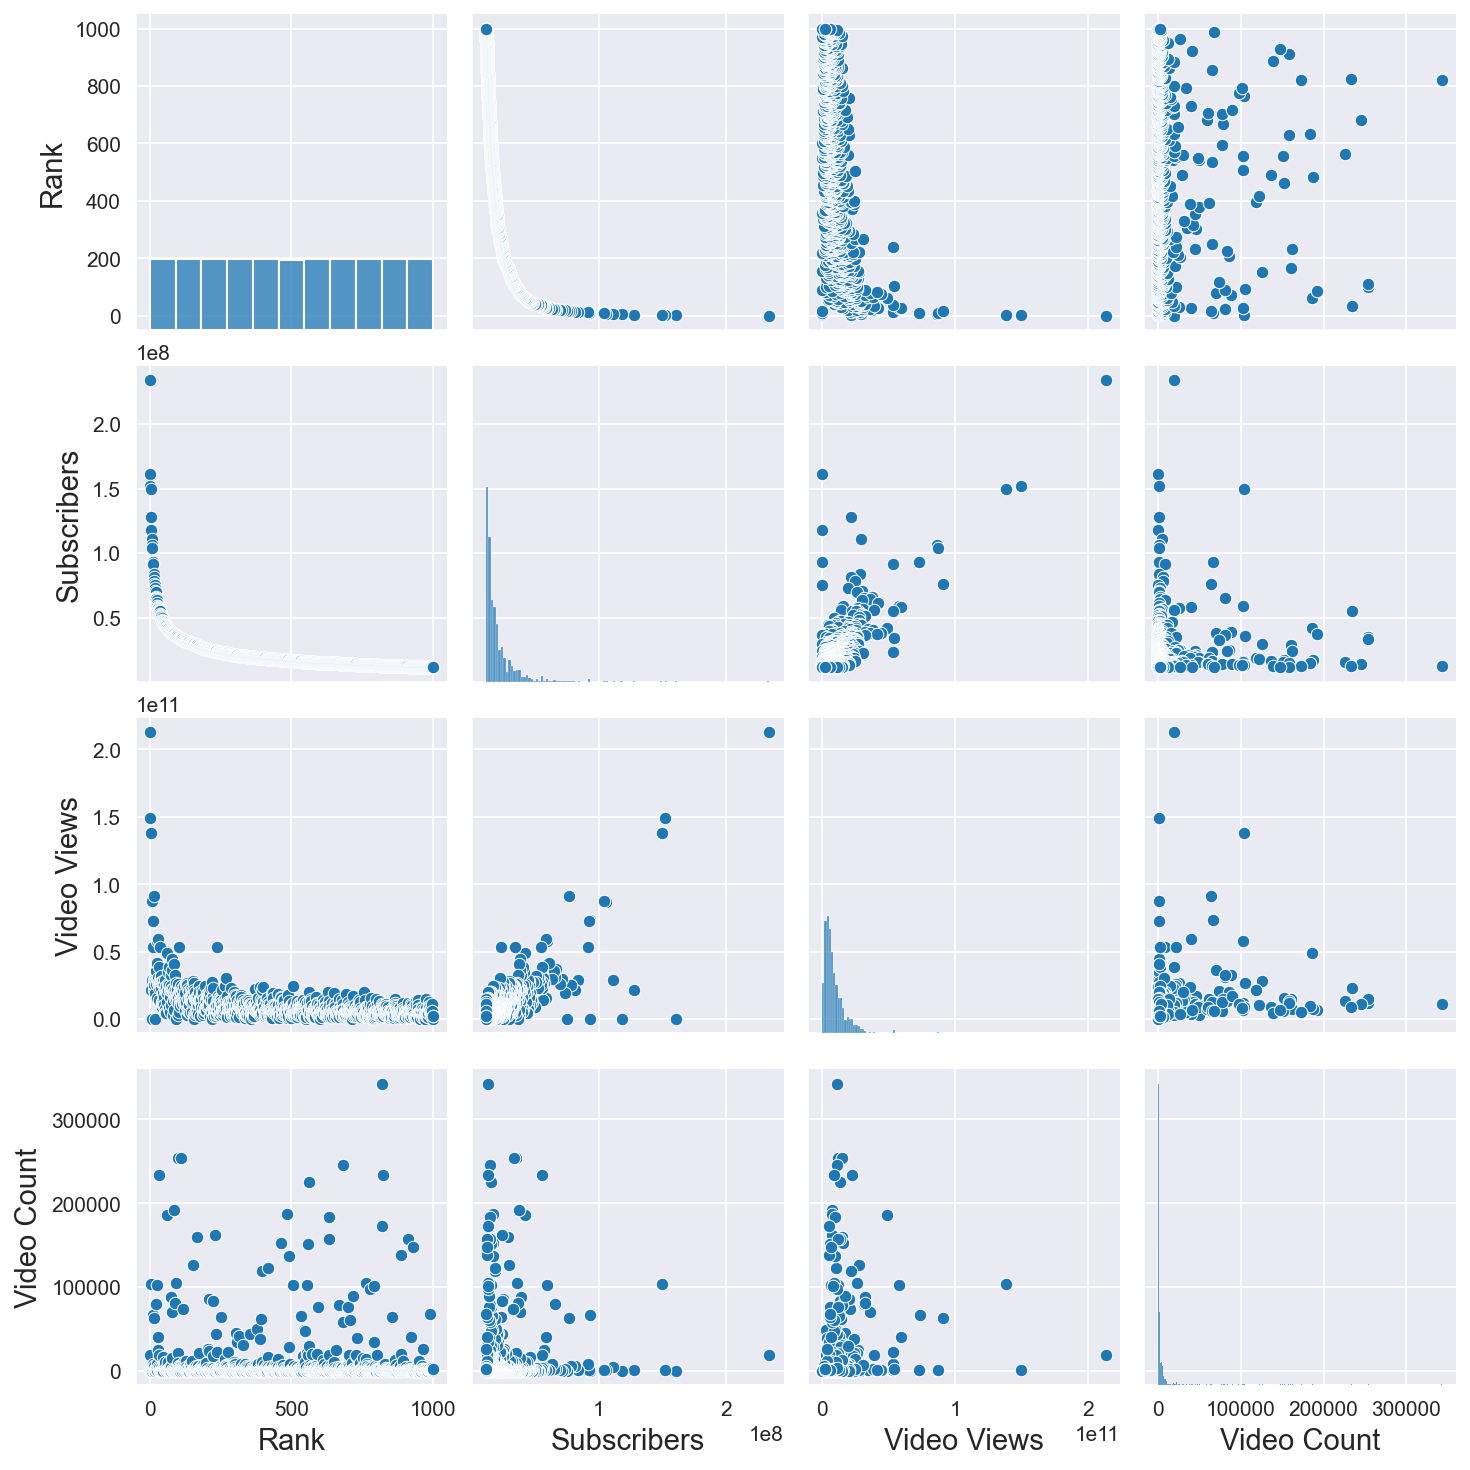

In [34]:
# Set default values for the graph plot
sns.set_style('darkgrid') #sets the style
plt.rcParams['font.size'] = 14 #default font size for the plot to 14 points.
plt.rcParams['figure.figsize'] = (9, 6) #sets the default figure size to 9 inches by 6 inches
plt.rcParams['figure.dpi'] = 150 #sets the default resolution of the figure to 150 dots per inch (dpi).
plt.rcParams['figure.facecolor'] = '#00000000' #sets the default background color of the figure to transparent.
plt.rcParams['xtick.labelsize'] = 10 #default font size for the x-axis tick labels to 10 points.
plt.rcParams['ytick.labelsize'] = 10 #sets the default font size for the y-axis tick labels to 10 points.

sns.pairplot(df) #creates a pairplot of the numerical features in the df dataframe
plt.show()

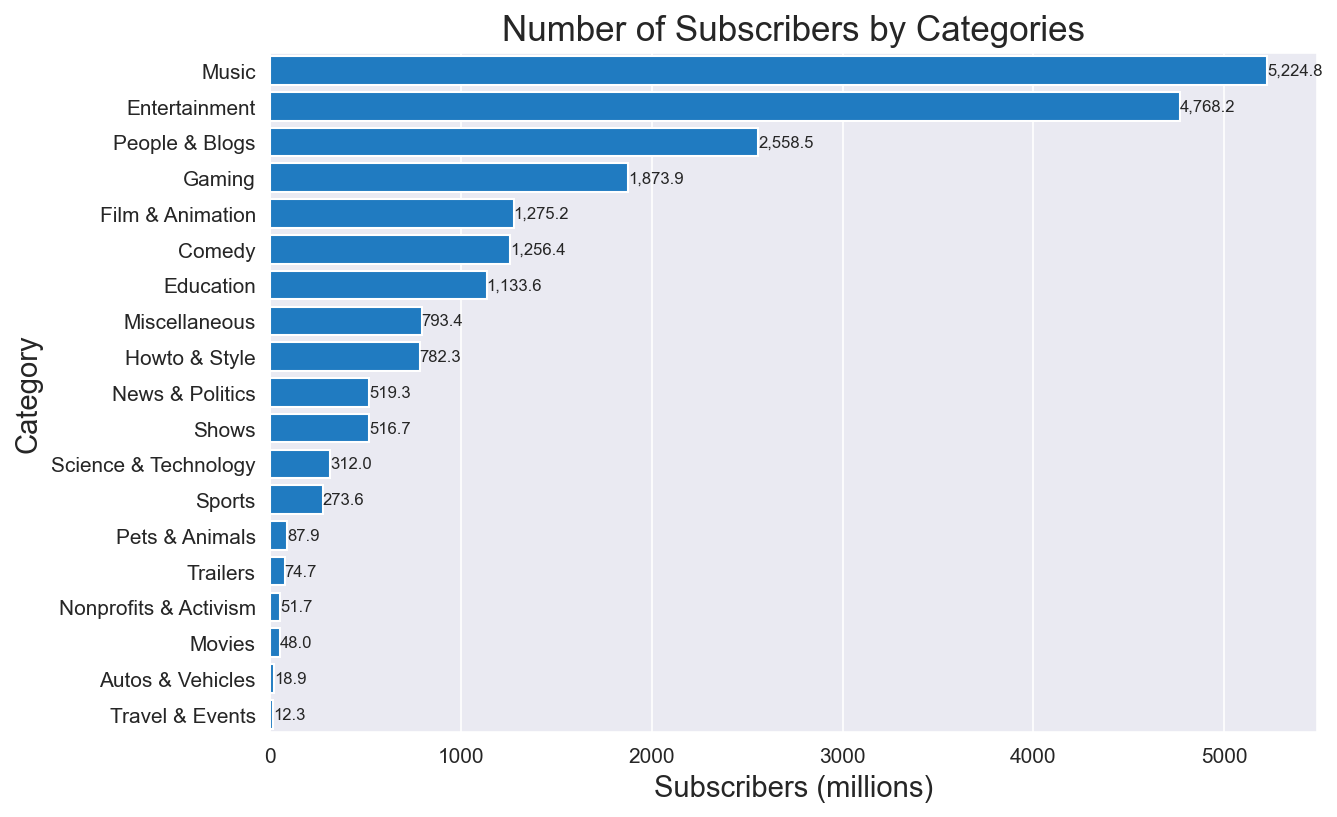

In [39]:
category_subscribers = df.groupby('Category', as_index=False)['Subscribers'].sum().sort_values('Subscribers', ascending=False)
# convert subscriber counts to millions
category_subscribers['Subscribers (millions)'] = category_subscribers['Subscribers'] / 1000000

# create a bar plot with the new column
ax = sns.barplot(x='Subscribers (millions)', y='Category', data=category_subscribers, color='#057fdc')

# add labels to the bars
for p in ax.containers:
    for q in p.patches:
        x = q.get_width()
        y = q.get_y() + q.get_height() / 2
        ax.text(x+0.1, y, '{:,.1f}'.format(x), ha='left', va='center', fontsize=8)
plt.title('Number of Subscribers by Categories');

# Boxplot
A box plot is a graphical rendition of statistical data based on the minimum, first quartile, median, third quartile, and maximum.
Because of the extending lines, this type of graph is sometimes called a box-and-whisker plot.

Explain:
------------------------
The box represents the interquartile range (IQR) of the data, with the median represented as a horizontal line inside the box. The whiskers extend to the minimum and maximum values within 1.5 times the IQR, and any data points beyond the whiskers are considered outliers and represented as individual points.

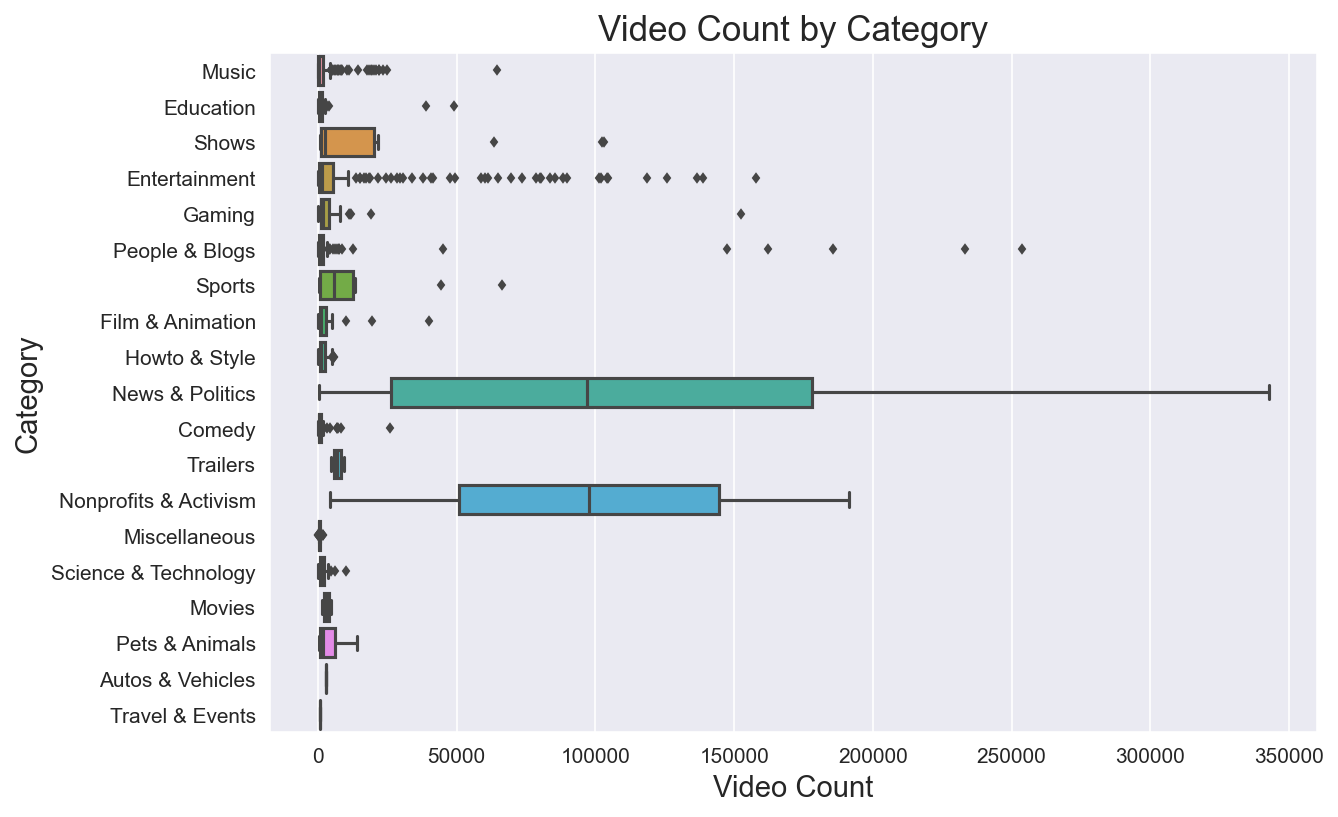

In [41]:
video_count = df[(df['Video Count'].isin([0])==False)]
ax = sns.boxplot(x='Video Count', y='Category', data=video_count, fliersize=3)
plt.title('Video Count by Category');

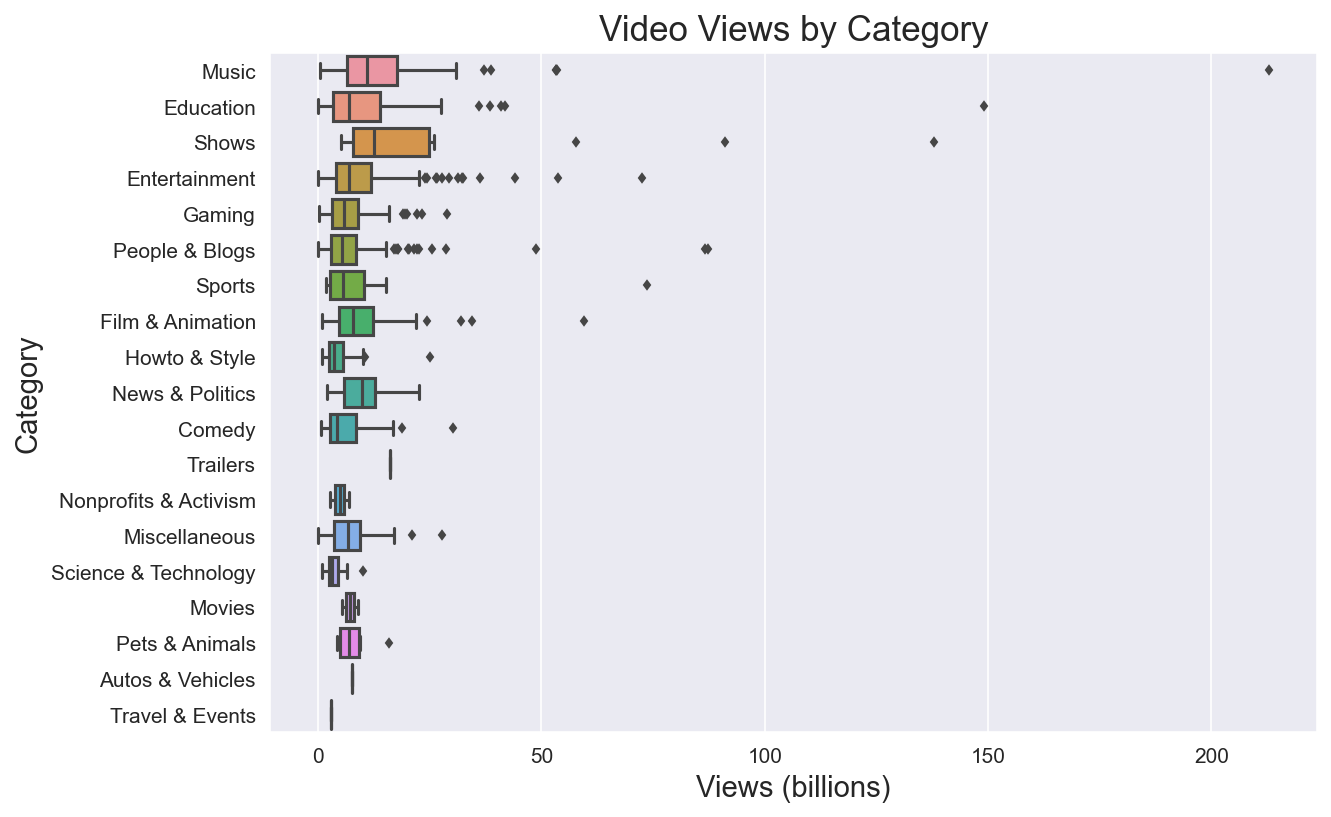

In [42]:
video_views = df[(df['Video Views'].isin([0])==False)]
sns.boxplot(x=video_views['Video Views']/1000000000, y='Category', data=video_views, fliersize=3)
plt.title('Video Views by Category')
plt.xlabel('Views (billions)');